# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

**TEAM 6 : WORLD CUP**

In [1]:
from google.colab import drive 

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from os import path
from PIL import Image

# import plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

from PIL import  Image
import pandas as pd
import seaborn as sns
import itertools
import warnings
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**`CLEAN DATA `**

In [3]:
matches = pd.read_csv('/content/gdrive/My Drive/HomeWork_week4/matches.csv')
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#A little cleaning of the data
matches.replace('NaN',np.nan, inplace=True)
matches.dropna(axis='index', how='all', inplace=True)
matches['Datetime'] = pd.to_datetime(matches['Datetime'])
matches.set_index('Year', inplace=True)
matches = matches.drop_duplicates(subset='MatchID')
matches.to_csv('WorldCupMatchesClean.csv')

In [5]:
matches.head(20)

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,
1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
1930.0,1930-07-16 14:45:00,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
1930.0,1930-07-17 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
1930.0,1930-07-17 14:45:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
1930.0,1930-07-18 14:30:00,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER


In [6]:
finals = matches[matches['Stage']=='Final']
def winners(year):
    try:
        "This function returns the worldcup winner for whichever year is entered"
        if finals.loc[year,'Home Team Goals'] > finals.loc[year,'Away Team Goals']:
            winner = finals.loc[year,'Home Team Name'] + ' ' + 'won' + " " +str(int(finals.loc[year,'Home Team Goals'])) + ' : '+ str(int(finals.loc[year,'Away Team Goals'])) + ' '+finals.loc[year,'Away Team Name']

        elif finals.loc[year,'Home Team Goals'] < finals.loc[year,'Away Team Goals']:
            winner = finals.loc[year,'Away Team Name'] + ' ' + 'won' + " "  +str(int(finals.loc[year,'Away Team Goals']))+ ' : ' +str(int(finals.loc[year,'Home Team Goals'])) +' '+ finals.loc[year,'Home Team Name']

        else:
            winner = finals.loc[year,'Win conditions']

        print(year,'Worldcup winner :')
        print('\033[1m' + winner.upper() + '\033[1m')   
    except:
        print('Please enter a valid year')

In [7]:
 print(winners(1998))
 finals.loc[1998]

1998 Worldcup winner :
FRANCE WON 3 : 0 BRAZIL
None


Datetime                1998-07-12 21:00:00
Stage                                 Final
Stadium                     Stade de France
City                           Saint-Denis 
Home Team Name                       Brazil
Home Team Goals                           0
Away Team Goals                           3
Away Team Name                       France
Win conditions                             
Attendance                            80000
Half-time Home Goals                      0
Half-time Away Goals                      2
Referee                  BELQOLA Said (MAR)
Assistant 1               WARREN Mark (ENG)
Assistant 2              SALIE Achmat (RSA)
RoundID                                1027
MatchID                                8788
Home Team Initials                      BRA
Away Team Initials                      FRA
Name: 1998.0, dtype: object

**DATA ANALYST**

In [8]:
world_cups = pd.read_csv('/content/gdrive/My Drive/HomeWork_week4/winners.csv')
world_cup_player = pd.read_csv('/content/gdrive/My Drive/HomeWork_week4/players.csv')
world_cups_matches = pd.read_csv('/content/gdrive/My Drive/HomeWork_week4/matches.csv')

In [9]:
world_cups = world_cups.replace('Germany FR', 'Germany')
world_cup_player = world_cup_player.replace('Germany FR', 'Germany')
world_cups_matches = world_cups_matches.replace('Germany FR', 'Germany')

In [10]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace('.', '').astype('int64')

In [11]:
world_cups.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000


In [12]:
world_cup_player.head(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN


**Which countries had won the cup ?**

Text(0.5, 1.0, 'Number of podium by country')

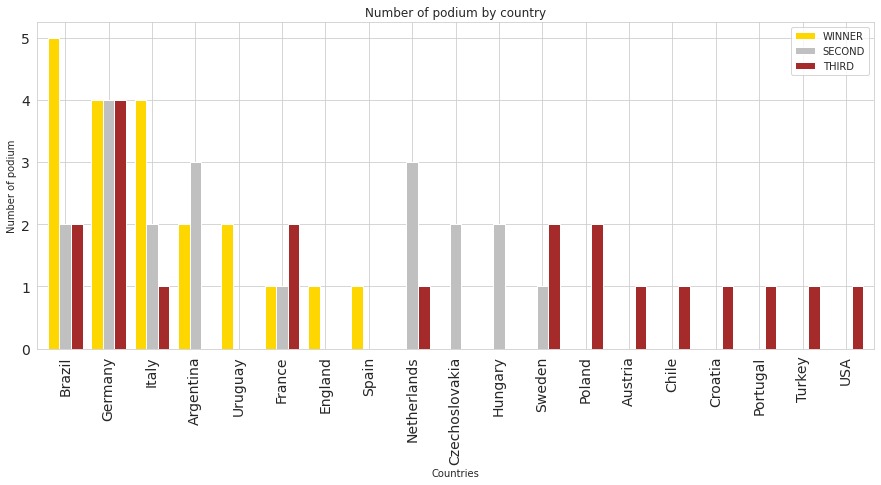

In [129]:
gold = world_cups["Winner"]
silver = world_cups["Runners-Up"]
bronze = world_cups["Third"]
gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())



podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')

podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']


podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

**Number of goal per country**

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

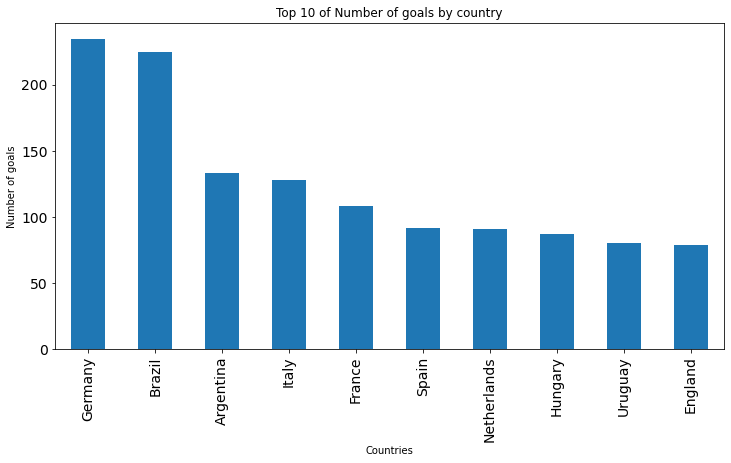

In [14]:
#world_cups_matches['Win conditions'].value_counts()
home = world_cups_matches[['Home Team Name', 'Home Team Goals']].dropna()
away = world_cups_matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')

**Attendance, number of teams, goals and matchs per cup**

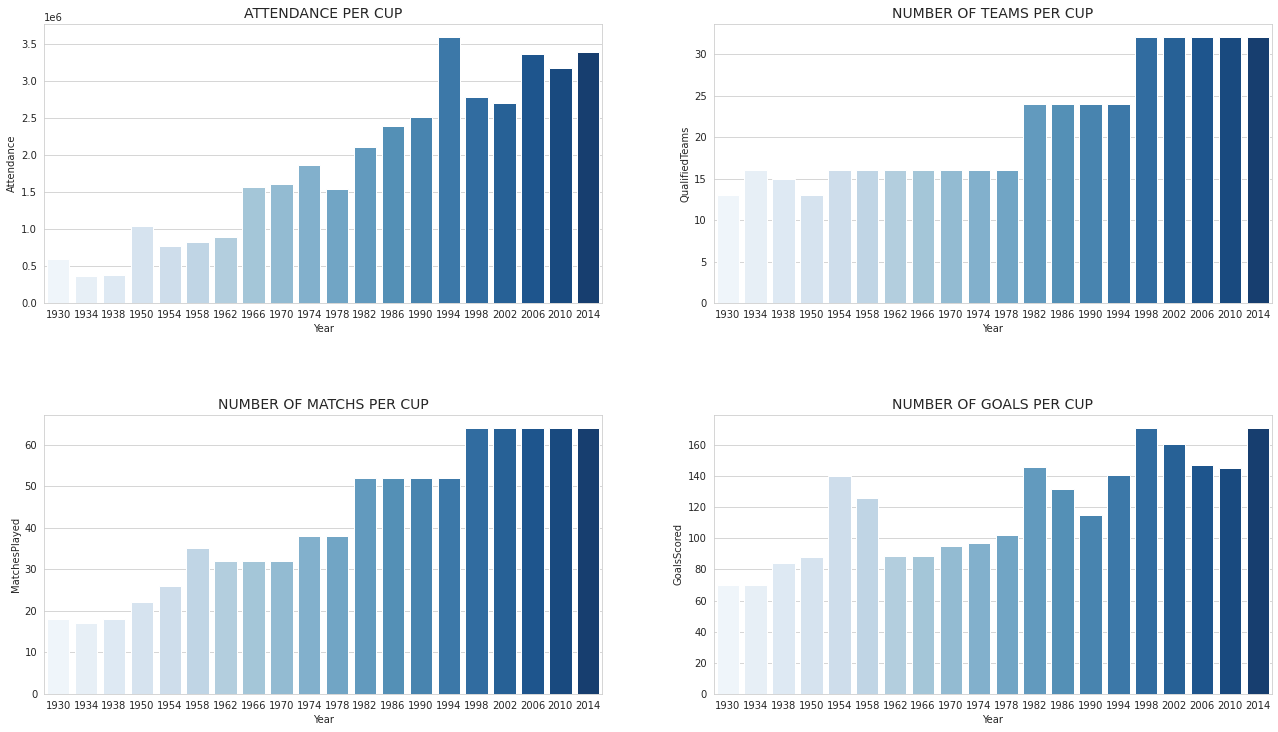

In [15]:
plt.figure(figsize = (22,12))
sns.set_style("whitegrid")
plt.subplot(221)
g1 = sns.barplot(x="Year", y="Attendance", data=world_cups, palette="Blues")
g1.set_title("ATTENDANCE PER CUP", fontsize=14)

plt.subplot(222)
g2 = sns.barplot(x="Year", y="QualifiedTeams", data=world_cups, palette="Blues")
g2.set_title("NUMBER OF TEAMS PER CUP", fontsize=14)

plt.subplot(223)
g2 = sns.barplot(x="Year", y="MatchesPlayed", data=world_cups, palette="Blues")
g2.set_title("NUMBER OF MATCHS PER CUP", fontsize=14)

plt.subplot(224)
g2 = sns.barplot(x="Year", y="GoalsScored", data=world_cups, palette="Blues")
g2.set_title("NUMBER OF GOALS PER CUP", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

Wordcloud of teams that have the most wins

In [16]:
matches  = pd.read_csv(r"/content/gdrive/My Drive/HomeWork_week4/matches.csv")
players  = pd.read_csv(r"/content/gdrive/My Drive/HomeWork_week4/players.csv")
cups     = pd.read_csv(r"/content/gdrive/My Drive/HomeWork_week4/winners.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("PLAYERS - DATA")
display(players.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'PLAYERS - DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


## Data - content 
The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



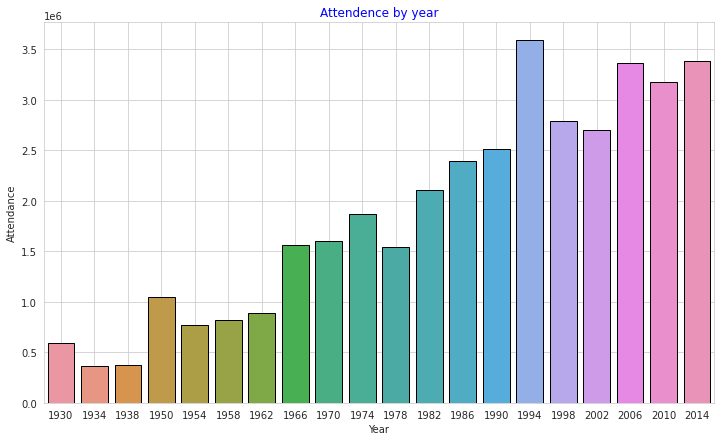

In [17]:
matches.isnull().sum()   # đếm số lượng null trong match


#removing duplicate rows for match id column  xóa  những dòng trùng nhay trong matchID 
matches = matches.drop_duplicates(subset="MatchID",keep="first")

#remob=ving null values
matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

# Average attendence by year
* A total of 3.43 million people watched the 64 games of the 2014 FIFA World Cup in Brazil live in the stadium. This meant that the average attendance per game was 53,758 , the highest average since the 1994 World Cup in the United States where average attendance is 68,991 per game. 

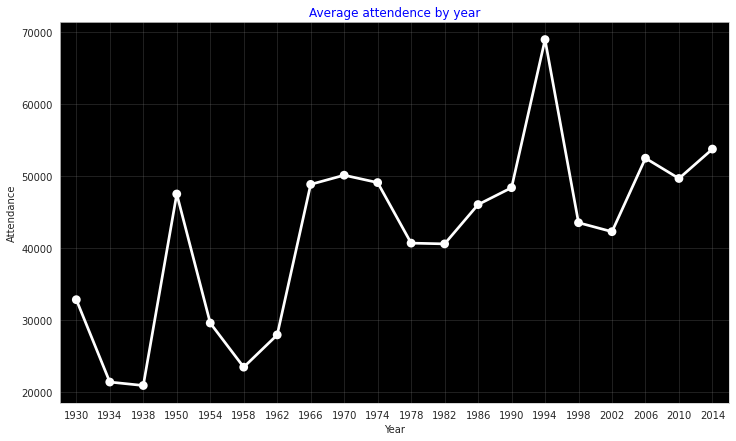

In [18]:
# nhóm theo năm lấy mean của cột attendance 
att1 = matches.groupby("Year")["Attendance"].mean().reset_index()
# đổi sang int
att1["Year"] = att1["Year"].astype(int)
plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendence by year",color='b')
plt.show()

In [19]:
att1

,Year,Attendance
0,1930,32808.277778
1,1934,21352.941176
2,1938,20872.222222
3,1950,47511.181818
4,1954,29561.807692
5,1958,23423.142857
6,1962,27911.625000
7,1966,48847.968750
8,1970,50124.218750
9,1974,49098.763158


# Total goals scored by year (Tổng số bàn thắng được ghi theo năm )

In [20]:
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


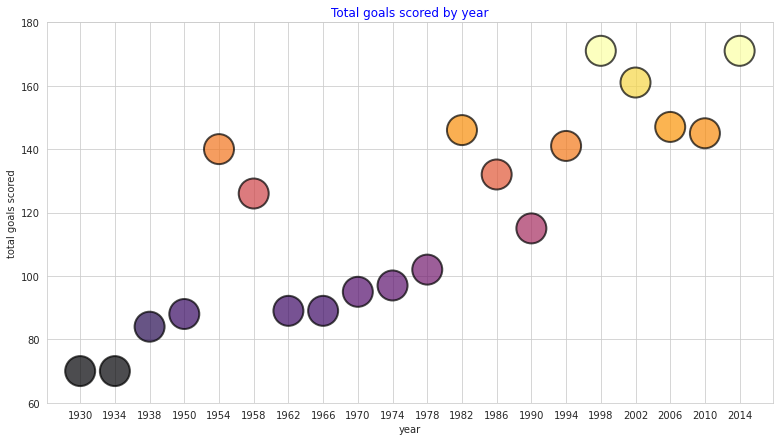

In [21]:
plt.figure(figsize=(13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()


# Total matches played and qualified teams  by year
* In the tournaments between 1934 and 1978, 16 teams competed in each tournament, except in 1938, when Austria was absorbed into Germany after qualifying, leaving the tournament with 15 teams, and in 1950, when India, Scotland, and Turkey withdrew, leaving the tournament with 13 teams
* The tournament was expanded to 24 teams in 1982, and then to 32 in 1998,also allowing more teams from Africa, Asia and North America to take part. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



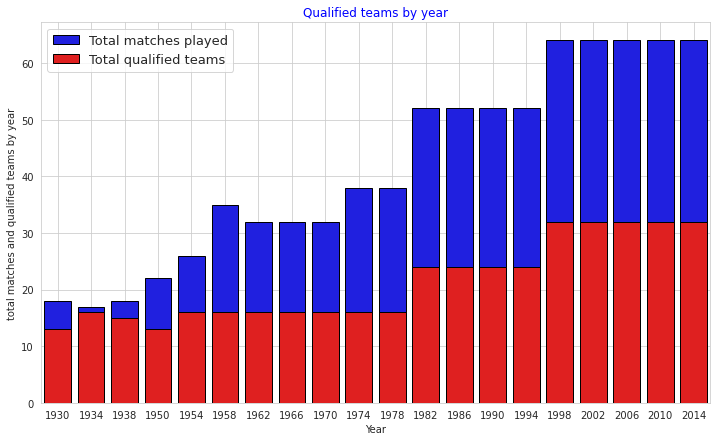

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(cups),color="b",label="Total matches played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(cups),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

# Matches with highest number of attendance

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



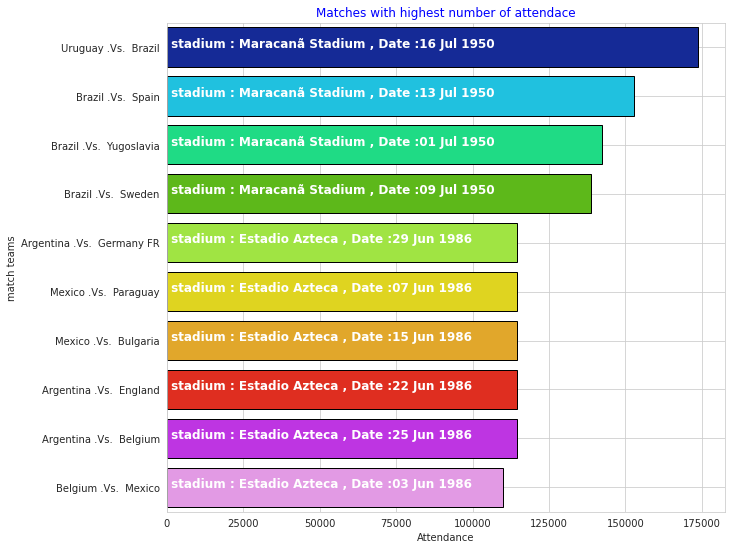

In [23]:
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

# Stadiums with highest average attendance

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



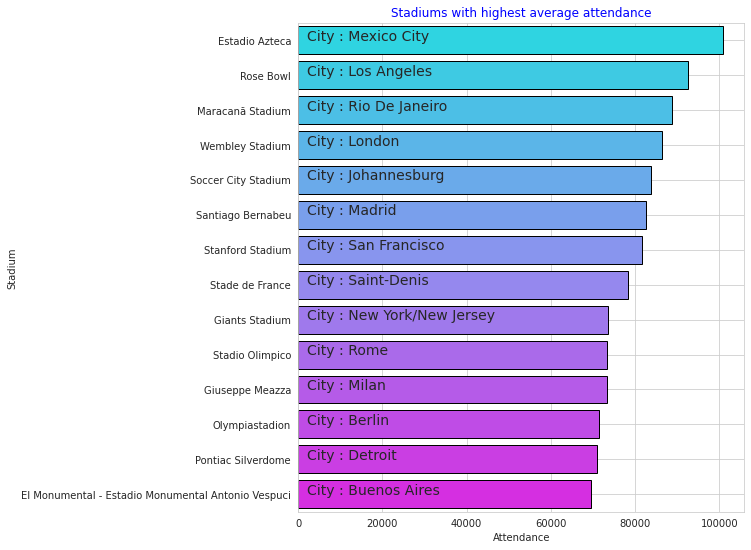

In [24]:
matches["Year"] = matches["Year"].astype(int)
matches["Datetime"] = matches["Datetime"].str.split("-").str[0]


matches["Stadium"] = matches["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches["Stadium"] = matches["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
std  = matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by = "Attendance",ascending =False)


plt.figure(figsize=(8,9))
ax = sns.barplot(y = std["Stadium"][:14],x = std["Attendance"][:14],palette="cool",
                 linewidth=1,edgecolor = "k"*14)
plt.grid(True)

for i,j in enumerate("  City : " + std["City"][:14]):
    ax.text(.7,i,j,fontsize=14)

plt.title("Stadiums with highest average attendance",color='b')
plt.show()


# Cities that hosted highest world cup matches

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



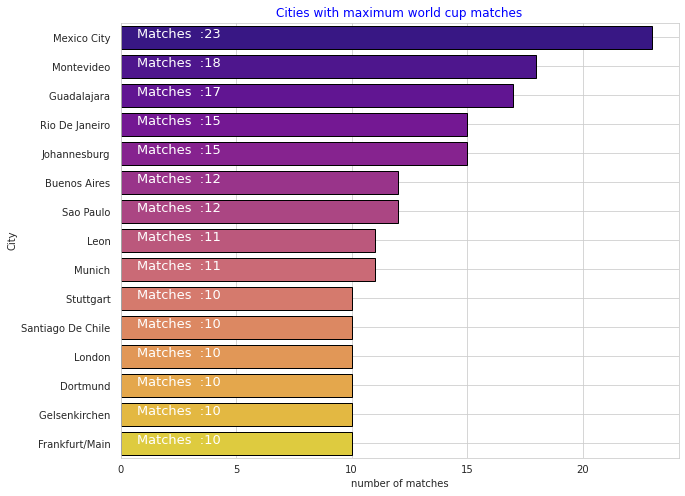

In [25]:
mat_c = matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="plasma",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b')

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

# Average attendance by city

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



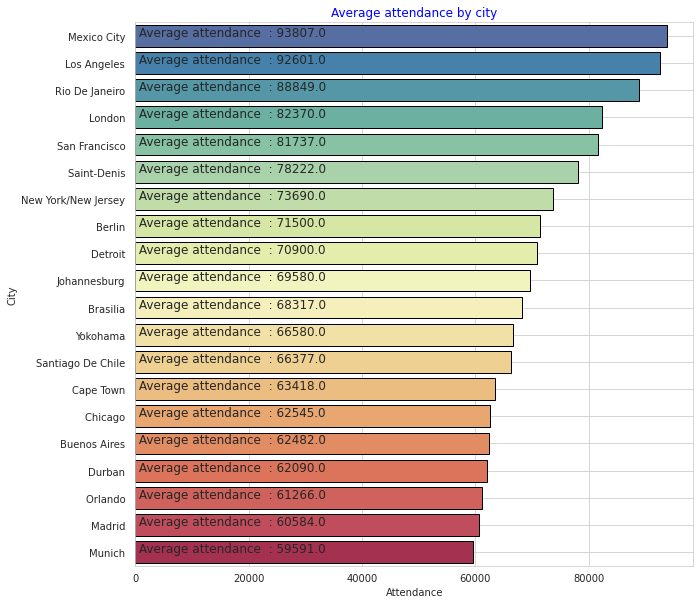

In [26]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b')
plt.show()


# Teams with the most world cup final victories
* The 20 World Cup tournaments have been won by eight national teams. Brazil have won five times, and they are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, with four titles each; Argentina and inaugural winner Uruguay, with two titles each; and England, France, and Spain, with one title each.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



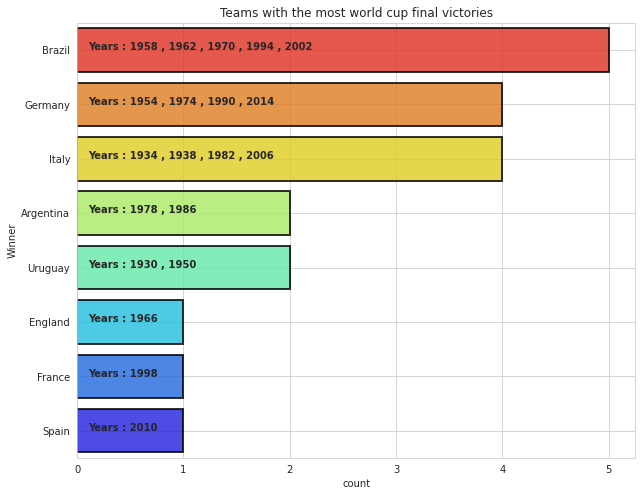

In [27]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

# World cup final results by nation

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1642: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



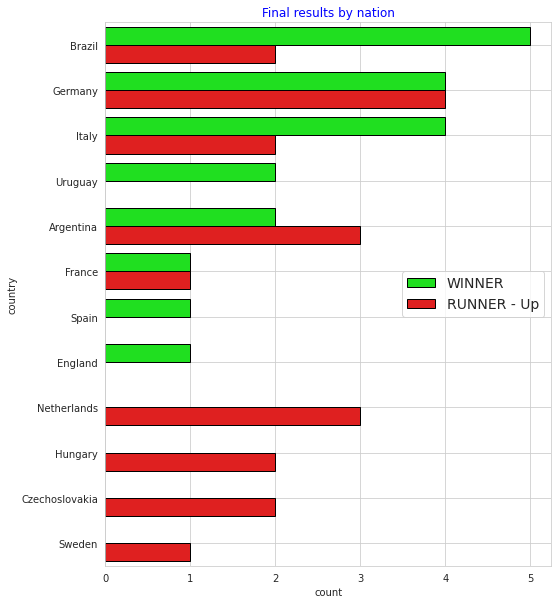

In [28]:
cou = cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,10))
sns.barplot("count","country",data=cou_t,
            hue="type",palette=["lime","r"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='b')
plt.show()

# World cup final result for third and fourth place by nation

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1642: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



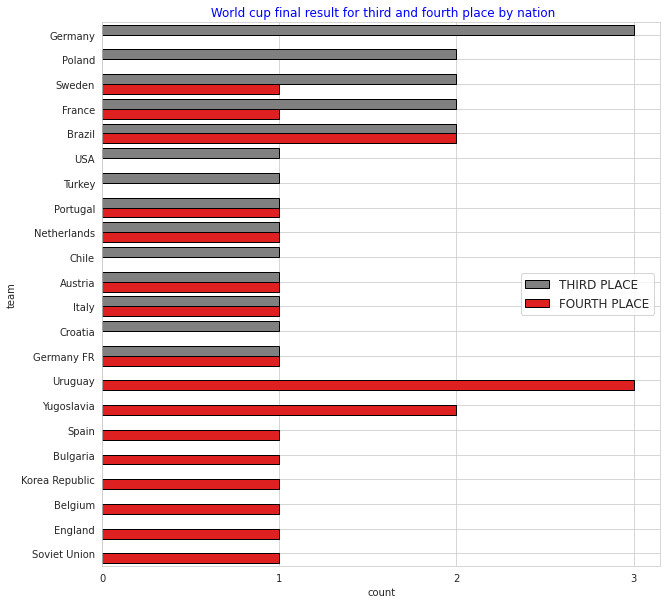

In [29]:
thrd = cups["Third"].value_counts().reset_index()
thrd.columns = ["team","count"]
thrd["type"] = "THIRD PLACE"

frth = cups["Fourth"].value_counts().reset_index()
frth.columns = ["team","count"]
frth["type"] = "FOURTH PLACE"

plcs = pd.concat([thrd,frth],axis=0)

plt.figure(figsize=(10,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = ["grey","r"])
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation",color='b')
plt.legend(loc="center right",prop={"size":12})
plt.show()

# Teams with the most world cup matches

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



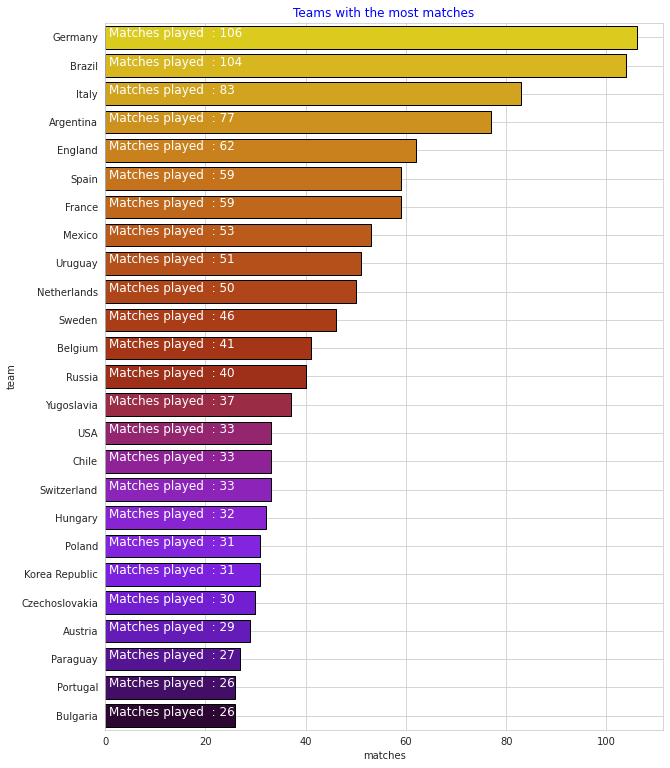

In [30]:
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Soviet Union","Russia")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Soviet Union","Russia")

ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='b')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")


# Teams with the most tournament participations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



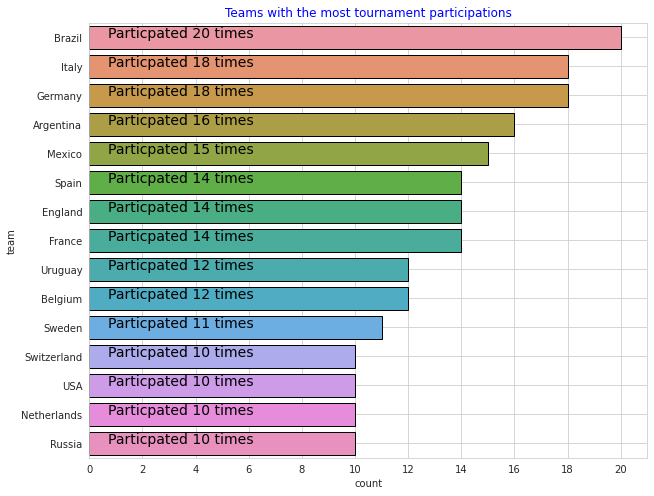

In [31]:
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],
                 linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b')
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()

# Distribution of home and away goals

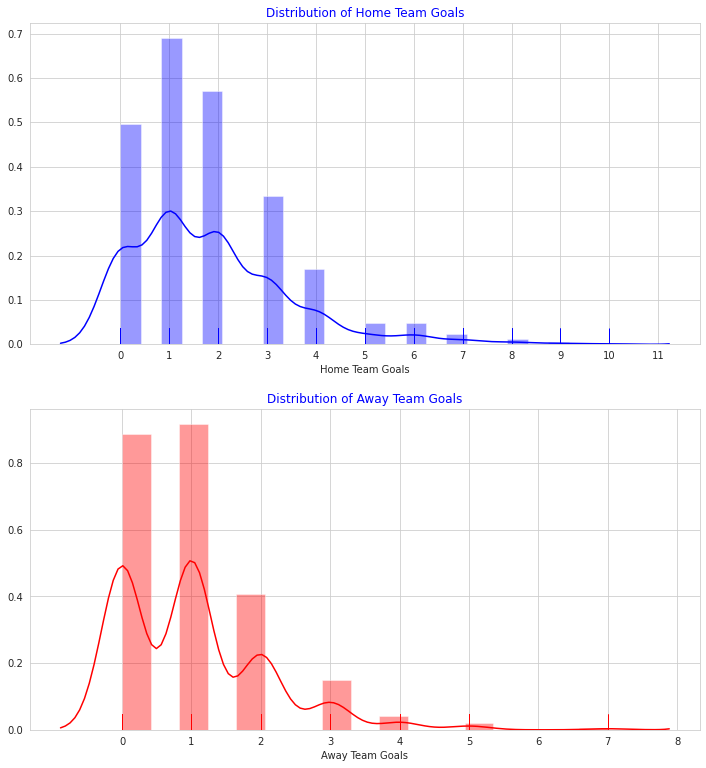

In [32]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals",color='b')


plt.subplot(212)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals",color='b')
plt.show()

# Distribution of Half time Home and Away Team Goals

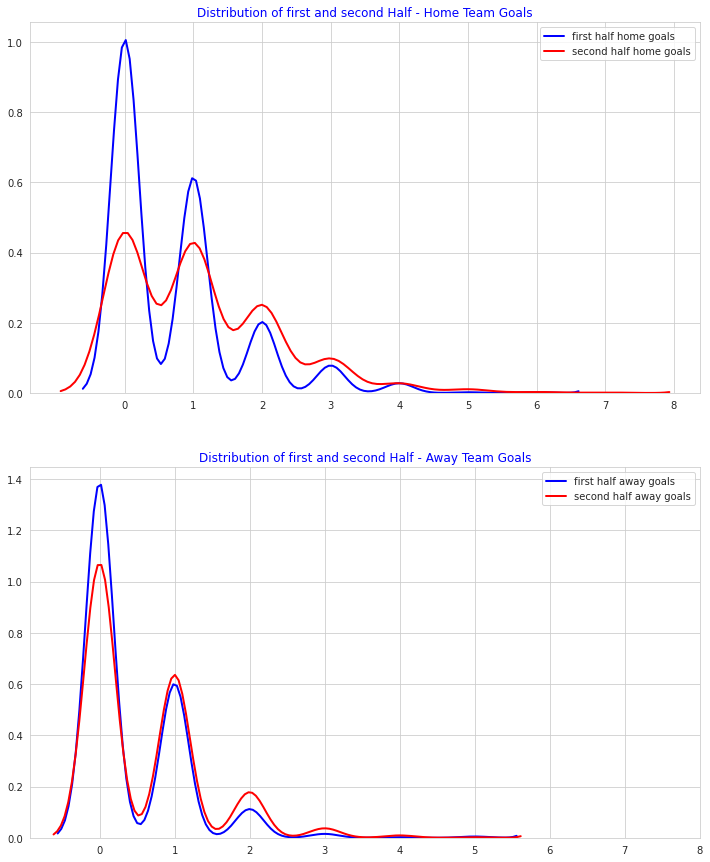

In [33]:
plt.figure(figsize=(12,15))
matches = matches.rename(columns={'Half-time Home Goals':"first half home goals",
                                  'Half-time Away Goals':"first half away goals"})

matches["second half home goals"] = matches["Home Team Goals"] - matches["first half home goals"]
matches["second half away goals"] = matches["Away Team Goals"] - matches["first half away goals"]

plt.subplot(211)
sns.kdeplot(matches["first half home goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half home goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Home Team Goals",color='b')

plt.subplot(212)
sns.kdeplot(matches["first half away goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half away goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Away Team Goals",color='b')
plt.show()

# Home and away goals by year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



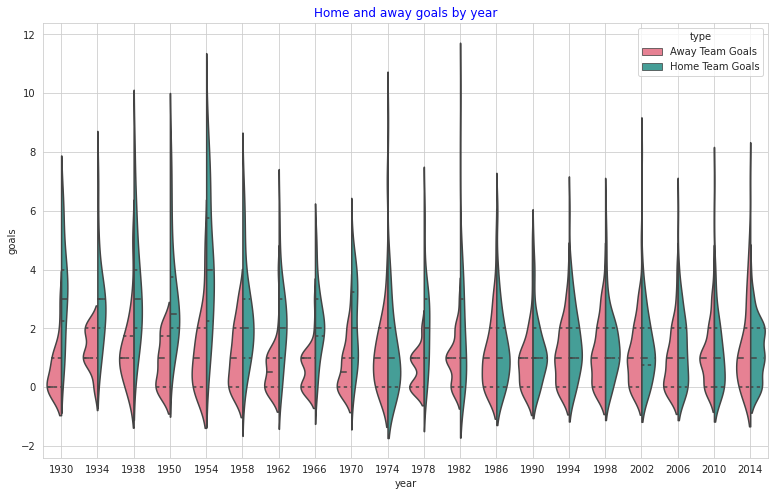

In [34]:
gh = matches[["Year","Home Team Goals"]]
gh.columns = ["year","goals"]
gh["type"] = "Home Team Goals"

ga = matches[["Year","Away Team Goals"]]
ga.columns = ["year","goals"]
ga["type"] = "Away Team Goals"

gls = pd.concat([ga,gh],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(gls["year"],gls["goals"],
               hue=gls["type"],split=True,inner="quart",palette="husl")
plt.grid(True)
plt.title("Home and away goals by year",color='b')
plt.show()

# First half home and away goals by year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



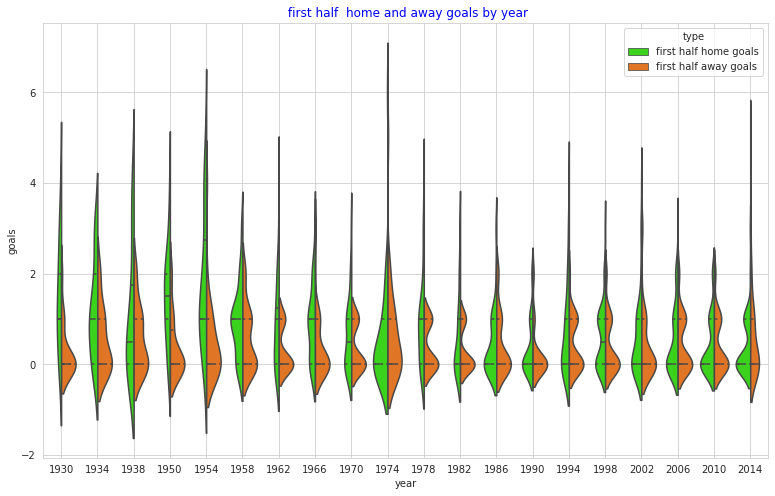

In [35]:
hhg = matches[["Year",'first half home goals']]
hhg.columns = ["year","goals"]
hhg["type"] = 'first half home goals'

hag = matches[["Year",'first half away goals']]
hag.columns = ["year","goals"]
hag["type"] = 'first half away goals'

h_time = pd.concat([hhg,hag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(h_time["year"],h_time["goals"],
               hue=h_time["type"],
               split=True,inner="quart",
               palette="gist_ncar")
plt.grid(True)
plt.title(" first half  home and away goals by year",color='b')
plt.show()

# Home and away goals by year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



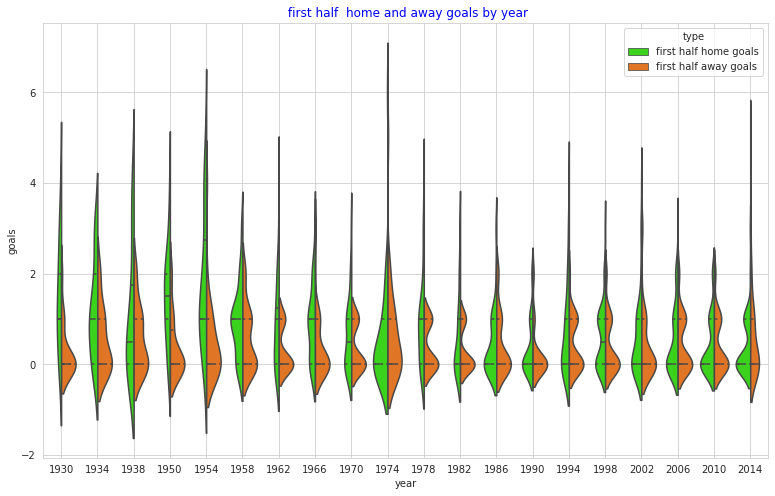

In [36]:
hhg = matches[["Year",'first half home goals']]
hhg.columns = ["year","goals"]
hhg["type"] = 'first half home goals'

hag = matches[["Year",'first half away goals']]
hag.columns = ["year","goals"]
hag["type"] = 'first half away goals'

h_time = pd.concat([hhg,hag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(h_time["year"],h_time["goals"],
               hue=h_time["type"],
               split=True,inner="quart",
               palette="gist_ncar")
plt.grid(True)
plt.title(" first half  home and away goals by year",color='b')
plt.show()

# Match outcomes by home and away teams


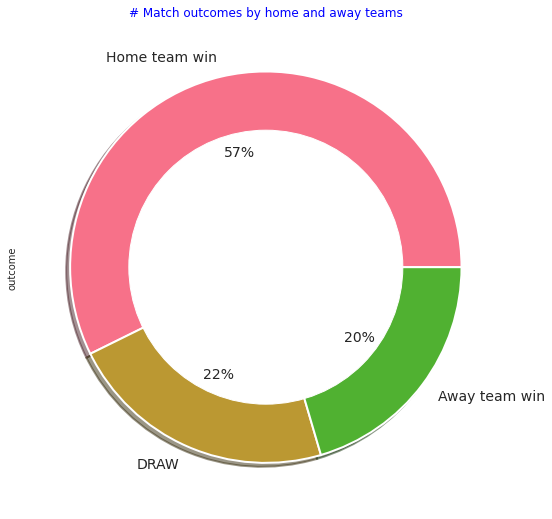

In [37]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams",color='b')
plt.show()

## Countries with maximum wins , loses and draw matches in world cup

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



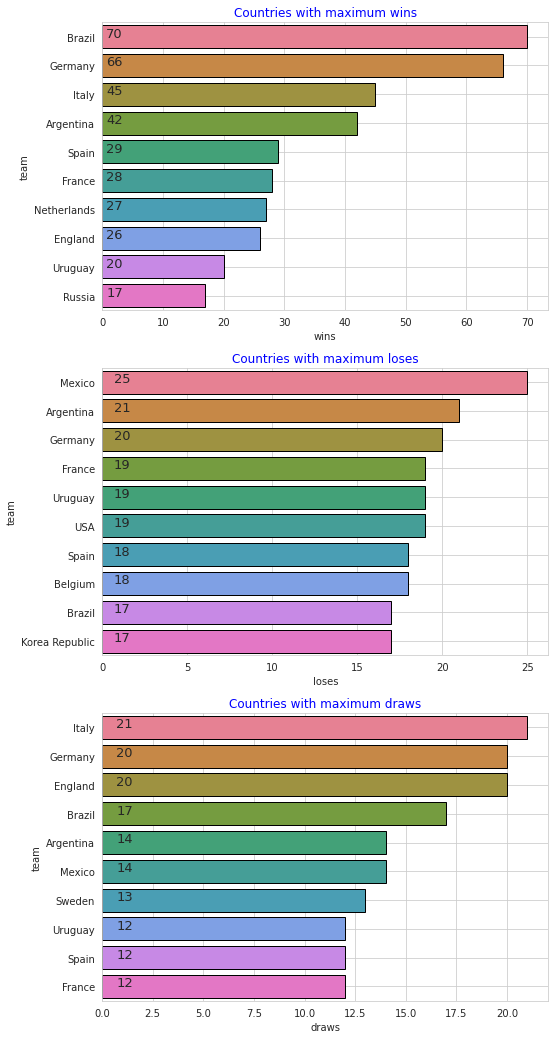

In [40]:
cols = [ 'wins', 'loses', 'draws']
length = len(cols)

plt.figure(figsize=(8,18))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(3,1,j+1)
    ax = sns.barplot(i,"team",data=wl1.sort_values(by=i,ascending=False)[:10],
                     linewidth=1,edgecolor="k"*10,palette="husl")
    for k,l in enumerate(wl1.sort_values(by=i,ascending=False)[:10][i]):
        ax.text(.7,k,l,fontsize=13)
    
    plt.grid(True)
    plt.title("Countries with maximum "+i,color='b')

# Teams with highest fifa world cup goals

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



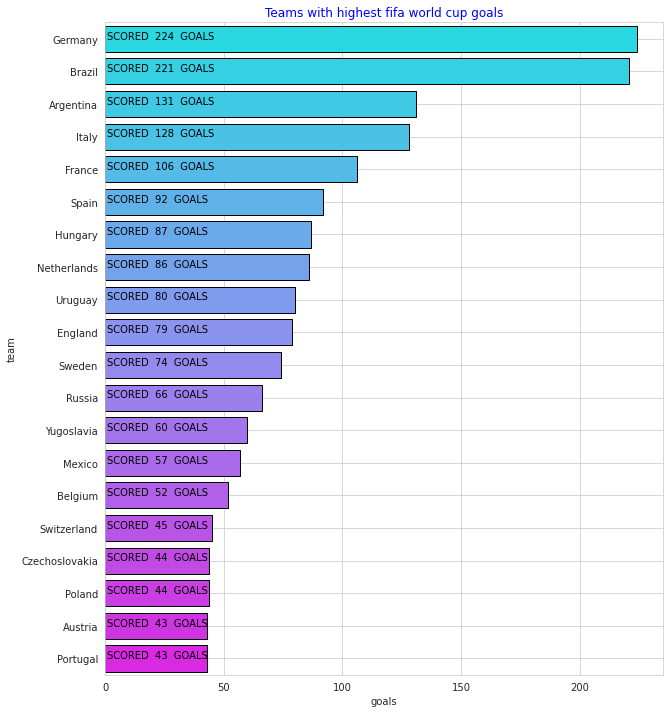

In [41]:
tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot("goals","team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("SCORED  " +total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals",color='b')
plt.grid(True)
plt.show()

# Highest total goals scored during a match 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1445: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



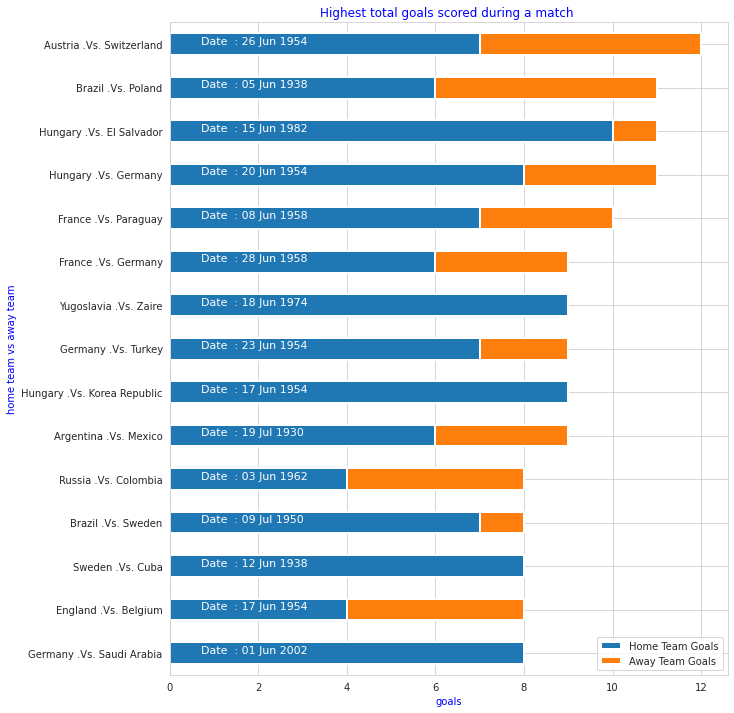

In [42]:
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
hig_gl = matches.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,12),linewidth=2,
                                                       edgecolor="w"*15)

plt.ylabel("home team vs away team",color="b")
plt.xlabel("goals",color="b")
plt.title("Highest total goals scored during a match ",color='b')

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()

# Total goals scored during games by year

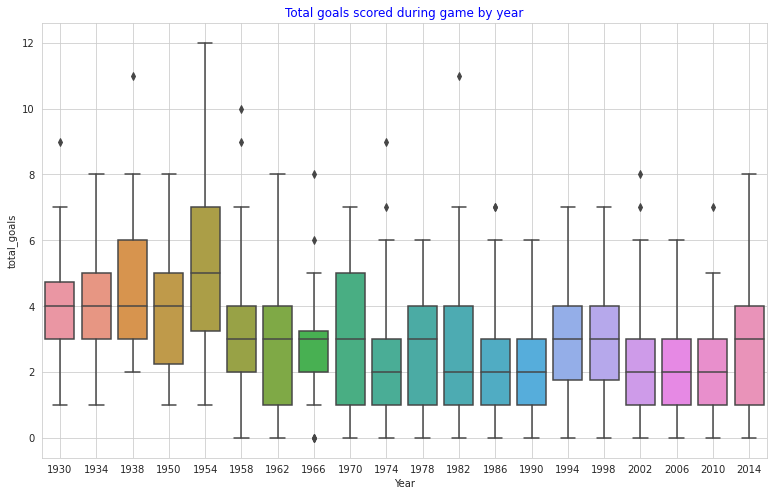

In [43]:
plt.figure(figsize=(13,8))
sns.boxplot(y=matches["total_goals"],
            x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color='b')
plt.show()


# Team comparator

In [44]:
#TEAM COMPARATOR
matches_played = mt.copy()
mat_new = matches_played.merge(lst,left_on="team",right_on="index",how="left")
mat_new = mat_new.merge(win,left_on="team",right_on="index",how="left")
mat_new = mat_new[["team","matches","lost_team","win_team"]]
mat_new = mat_new.fillna(0)
mat_new["win_team"] = mat_new["win_team"].astype(int)
mat_new["draws"]    = (mat_new["matches"]) - (mat_new["lost_team"] + mat_new["win_team"])
mat_new = mat_new.merge(total_goals,left_on="team",right_on="team",how="left")
mat_new = mat_new.rename(columns={"win_team":"wins","lost_team":"loses"})

def team_compare(team1,team2):
    
    lst = [team1,team2]
    dat = mat_new[mat_new["team"].isin(lst)]
    
    plt.figure(figsize=(12,10))
    cols   = ["matches","goals","wins","loses","draws"]
    length = len(cols)
    
    for i,j in itertools.zip_longest(cols,range(length)):
        
        fig = plt.subplot(3,2,j+1)
        ax  = sns.barplot(dat[i],dat["team"],palette=["royalblue","r"],
                         linewidth=2,edgecolor="k"*len(lst))
        plt.ylabel("")
        plt.yticks(fontsize=13)
        plt.grid(True,color="grey",alpha=.3)
        plt.title(i,color="b",fontsize=15)
        plt.subplots_adjust(wspace = .3,hspace =.5)
        fig.set_facecolor("w")
        
        for k,l in enumerate(dat[i].values):
            ax.text(.7,k,l,weight = "bold",fontsize = 20)
            

# Portugal & Argentina

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



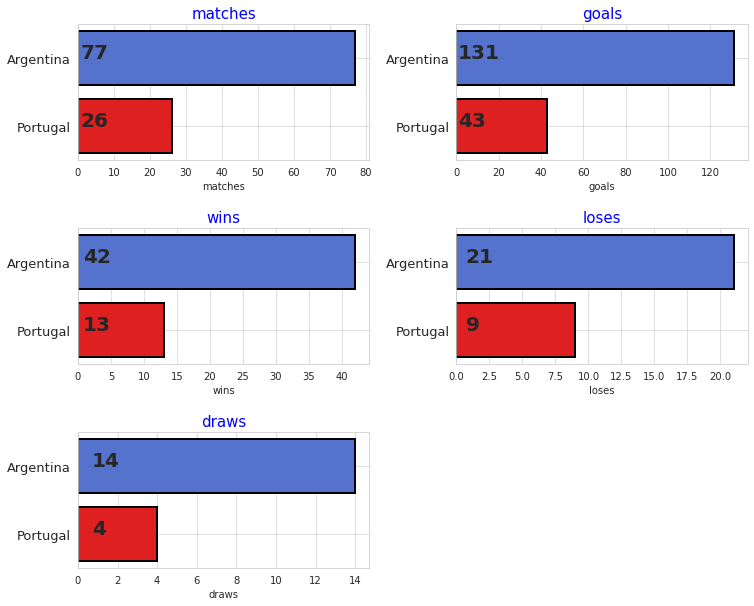

In [45]:
team_compare("Portugal","Argentina")

# France & Croatia

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



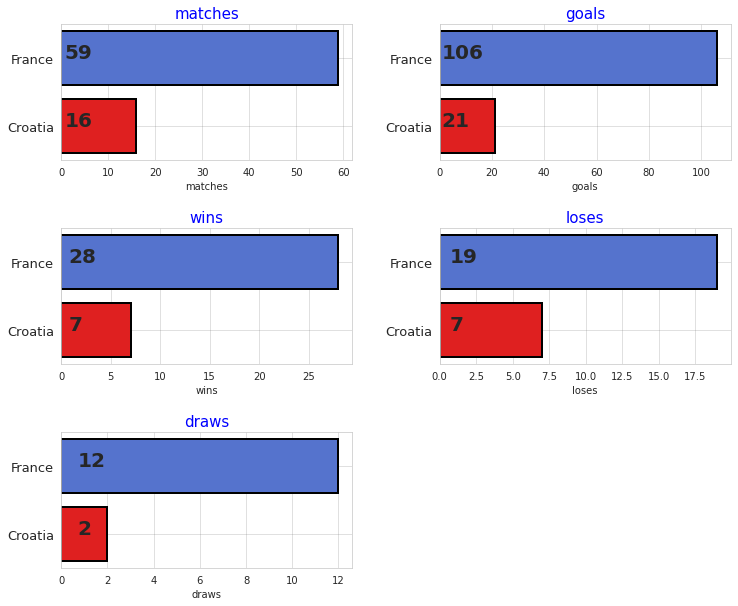

In [46]:
team_compare("France","Croatia")

# Spain & Italy

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



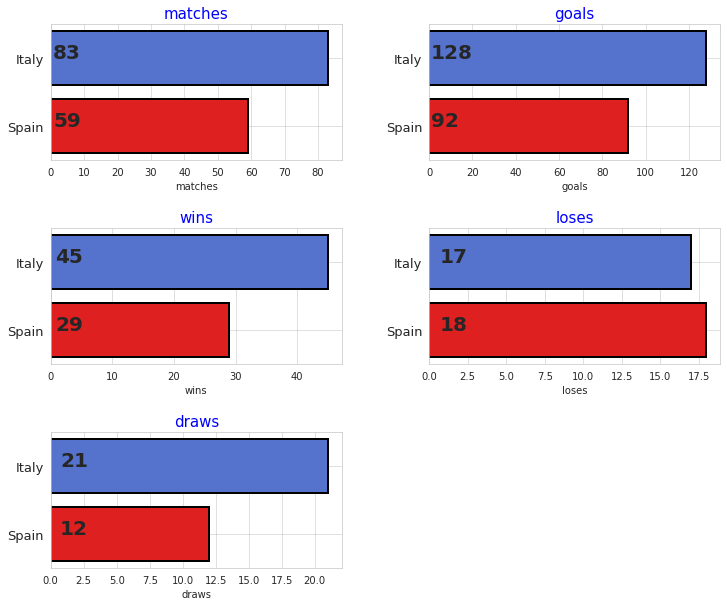

In [47]:
team_compare("Italy","Spain")

# Brazil & Germany

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



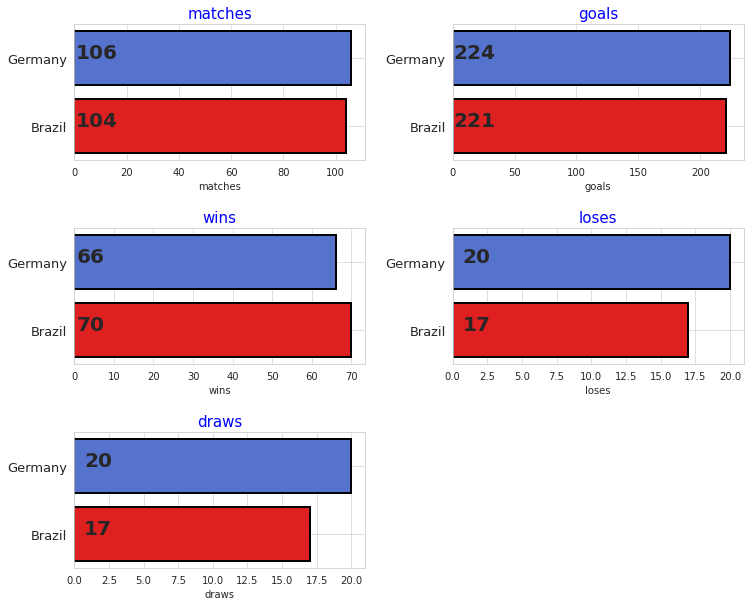

In [48]:
team_compare("Brazil","Germany")

# Referee's with most matches

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



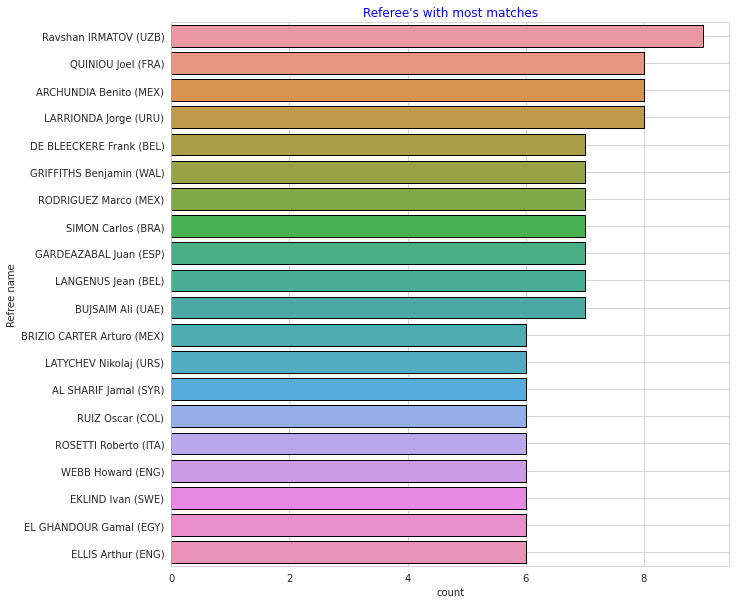

In [49]:
ref = matches["Referee"].value_counts().reset_index()
ref = ref.sort_values(by="Referee",ascending=False)

plt.figure(figsize=(10,10))
sns.barplot("Referee","index",data=ref[:20],linewidth=1,edgecolor="k"*20)
plt.xlabel("count")
plt.ylabel("Refree name")
plt.grid(True)
plt.title("Referee's with most matches",color='b')
plt.show()

# Goals per game by top countries 

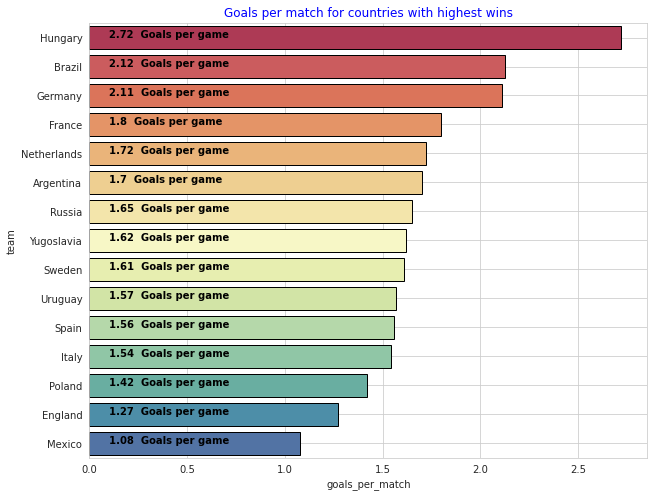

In [50]:
mat_new["goals_per_match"] = mat_new["goals"] / mat_new["matches"]
cou_lst = mat_new.sort_values(by="wins",ascending=False)[:15]["team"].tolist()
cou_gpm = mat_new[mat_new["team"].isin(cou_lst)]
cou_gpm = cou_gpm.sort_values(by="goals_per_match",ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot("goals_per_match","team",
                 linewidth=1,
                 edgecolor=["k"]*len(cou_gpm),
                 data=cou_gpm,
                 palette="Spectral")

for i,j in enumerate(np.round(cou_gpm["goals_per_match"],2).astype(str) + "  Goals per game"):
    ax.text(.1,i,j,color="k",weight = "bold")
    
plt.grid(True)
plt.title("Goals per match for countries with highest wins",color='b')
plt.show()

# Interactions between teams

In [80]:
!pip3 install networkx

In [83]:
import networkx as nx 

def interactions(year,color):
    
    df  =  matches[matches["Year"] == year][["Home Team Name","Away Team Name"]]
    G   = nx.from_pandas_edgelist(df,"Home Team Name","Away Team Name")
    # g_data=G=nx.from_pandas_edgelist(x, 1, 2, edge_attr=True)

    plt.figure(figsize=(10,9))
    
    nx.draw_kamada_kawai(G,with_labels = True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "h",
                         edgecolor  = "k",
                         linewidths  = 5 ,
                         font_size  = 13 ,
                         alpha=.8)
    
    plt.title("Interaction between teams :" + str(year) , fontsize =13 , color = "b")
    

# Interactions between teams for year 2014

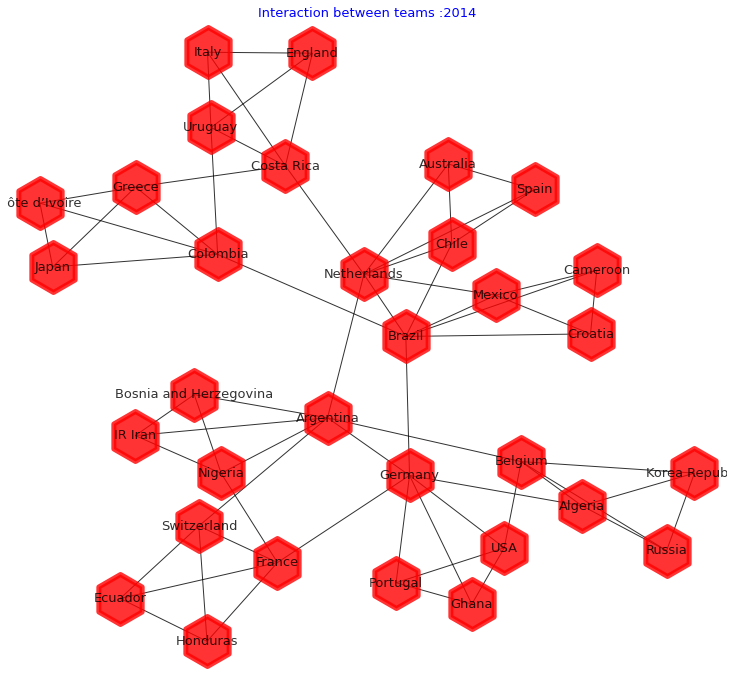

In [84]:
interactions(2014,"r")

# 1994

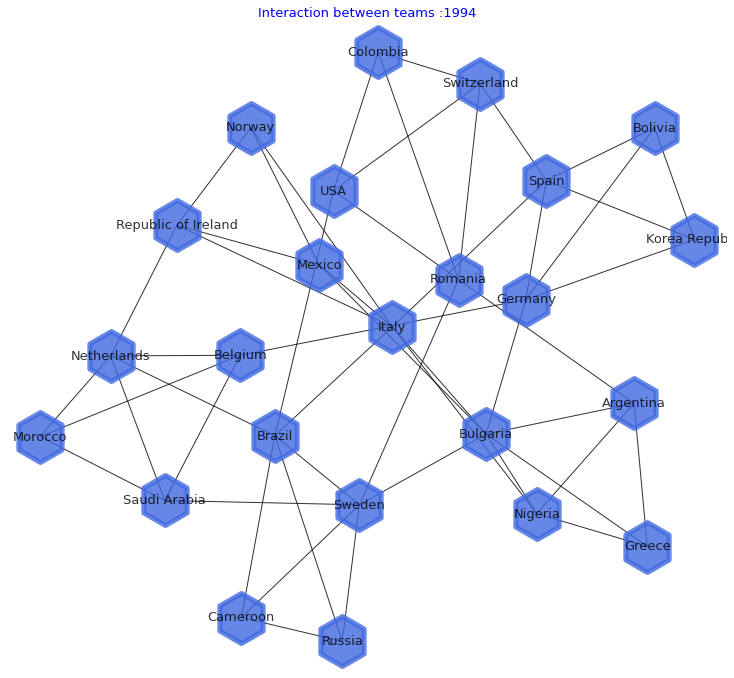

In [85]:
interactions(1994,"royalblue")

# Interactions between teams for year 1950

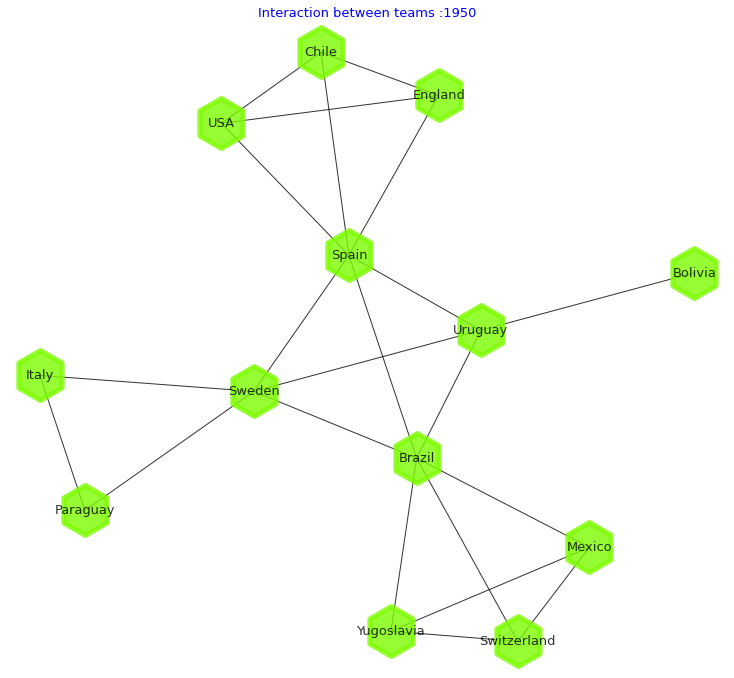

In [86]:
interactions(1950,"lawngreen")

# Interactions between teams for year 1930

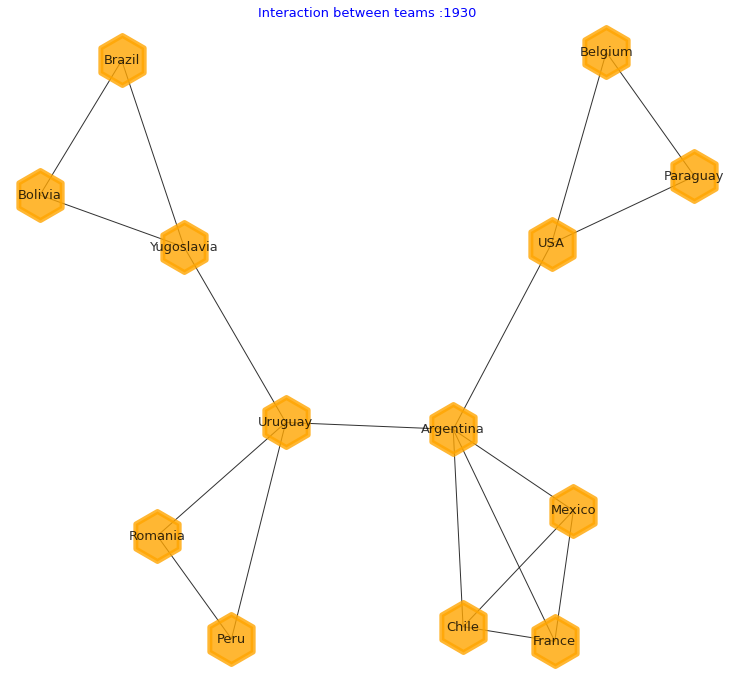

In [87]:
interactions(1930,"Orange")

# Total world cup matches played in each country

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



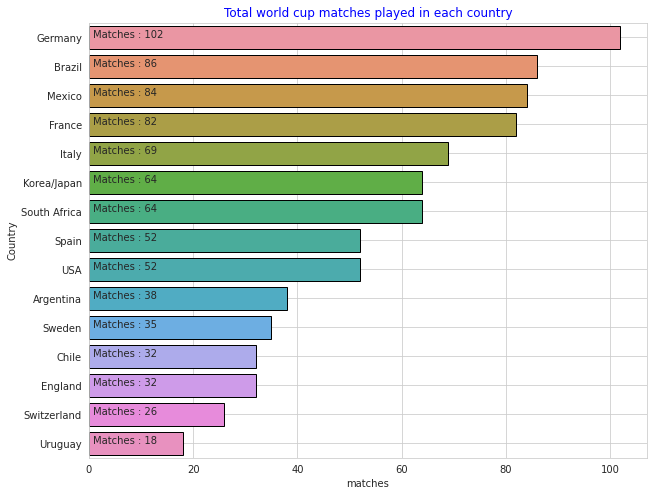

In [88]:
ysc = matches[["Year","Stadium","City","MatchID"]]
cy  = cups[["Year","Country"]]
ysc = ysc.merge(cy,left_on="Year",right_on="Year",how="left")
#ysc["Stadium"] = ysc["Stadium"].str.split(",").str[0]
ysc["std_cty"] = ysc["Stadium"] +" , "+ ysc["City"]

cnt_mat  =  ysc.groupby("Country")["MatchID"].nunique().reset_index()
cnt_mat  =  cnt_mat.sort_values(by= "MatchID",ascending=False)
cnt_mat


plt.figure(figsize=(10,8))

ax = sns.barplot("MatchID","Country",
                data=cnt_mat,
                linewidth=1,
                edgecolor="k"*cnt_mat["Country"].nunique())

for i,j in enumerate("Matches : " + cnt_mat["MatchID"].astype(str)):
    ax.text(.7 ,i,j)

plt.title("Total world cup matches played in each country",color='b')
plt.grid(True)
plt.xlabel("matches")
plt.show()

# Stadiums by countries

In [105]:
ysc["Country_yr"] = ysc["Country"] + " - " + ysc["Year"].astype(str)


def stadium_country(country,color):
    
    dat2 = ysc[ysc["Country"] == country]
    
    plt.figure(figsize=(10,8))

    H = nx.from_pandas_edgelist(dat2,"Country","Stadium")

    nx.draw_kamada_kawai(H,
                         with_labels=True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "s",
                         edgecolor  = "k",
                         linewidths  = 7 ,
                         font_size  = 13 ,
                         alpha=.8,
                         weight = "bold")

# Stadiums - Germany

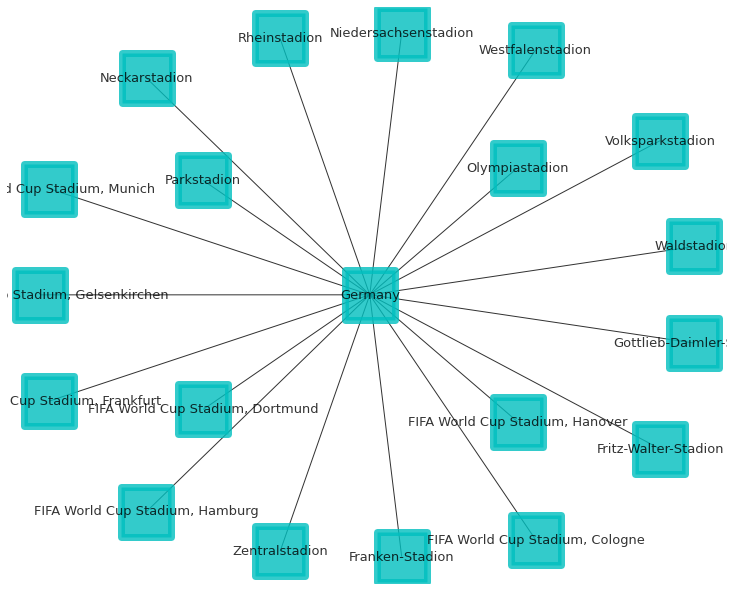

In [106]:
stadium_country("Germany","c")

# Stadiums - Brazil

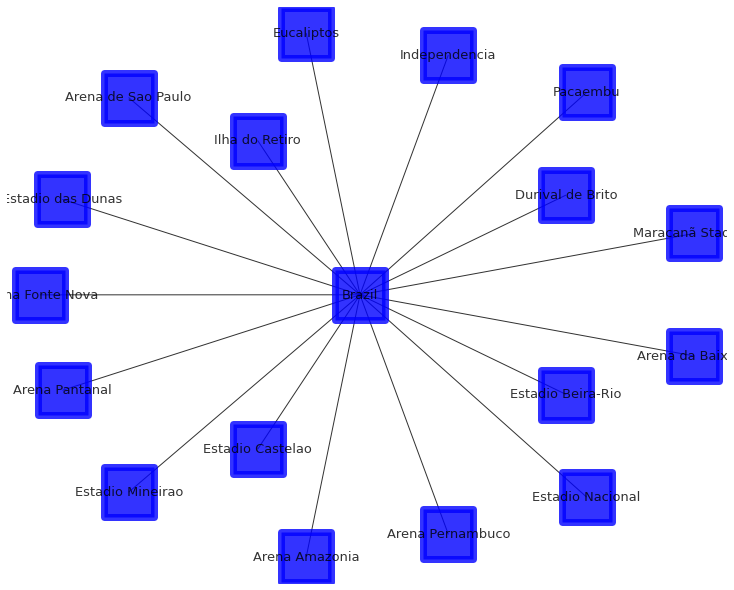

In [107]:
stadium_country("Brazil","b")

# Stadiums - Mexico

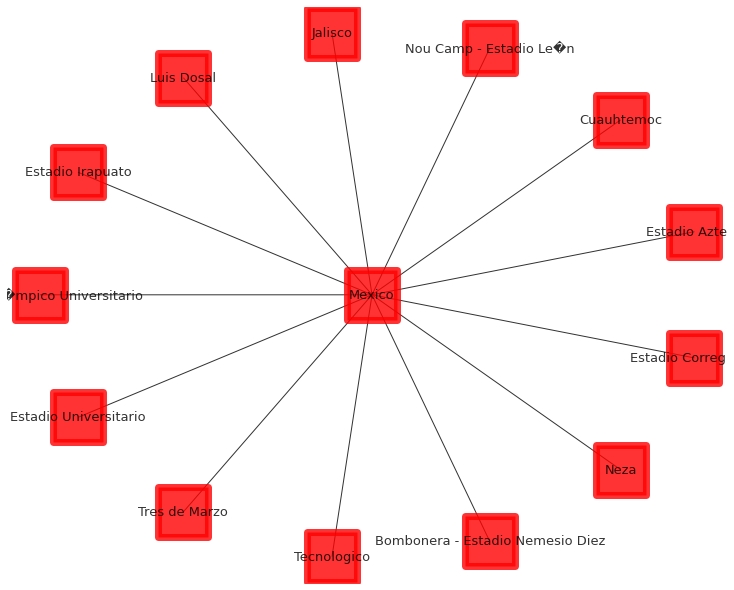

In [108]:
stadium_country("Mexico","r")

# Stadiums - USA

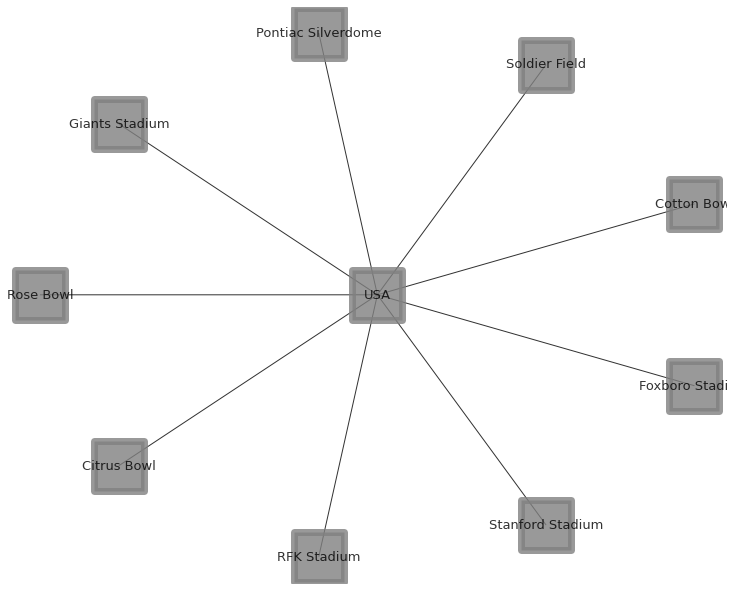

In [109]:
stadium_country("USA","grey")

# Player names

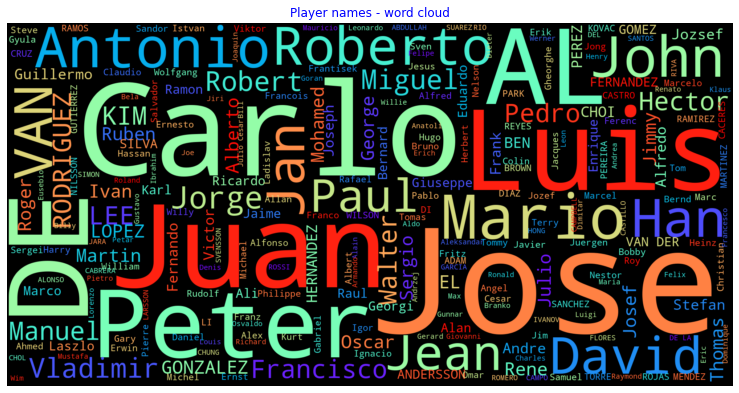

In [110]:
wrds = players["Player Name"].value_counts().keys()

wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Player names - word cloud",color='b')
plt.show()

![](http://)# Coach names

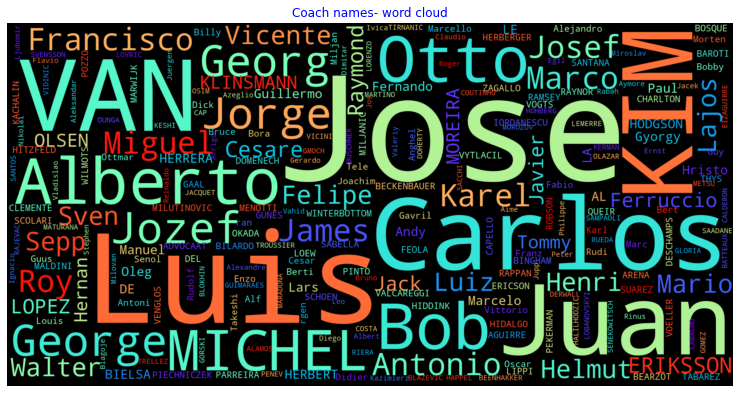

In [111]:
wrds1 = players["Coach Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(13,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Coach names- word cloud",color='b')
plt.show()

# The Golden Goal  : 
* Golden goal or golden point is a rule used in association football, bandy, lacrosse, field hockey, ice hockey, floorball and korfball to decide the winner of a match (typically a knock-out match) in which scores are equal at the end of normal time. It is a type of sudden death.

* From the Round of 16 on, matches which are drawn after 90 minutes will go into extra time (2 x 15 minutes). The first team to score a goal in extra time will immediately be declared the winner. If there is no goal scored in 30 minutes of extra time, the match will be settled in the customary manner by a penalty shoot-out.

In [112]:
win_conditions = matches[matches["Win conditions"] != " "]
extra_time    = win_conditions[win_conditions["Win conditions"].str.contains("extra time")]
penalties     = win_conditions[win_conditions["Win conditions"].str.contains("penalties")]

gold_goal     = win_conditions[win_conditions["Win conditions"].str.contains("Golden Goal")]
gold_goal.index  = gold_goal["MatchID"].astype(int)

gg= gold_goal[["Datetime","Stage","Home Team Name",
              "Away Team Name","Home Team Goals",
              "Away Team Goals","first half home goals",
              "second half home goals","win_team","Win conditions"]].transpose()
gg.style.set_properties(**{"background-color":"black",
                           "color" : "white",
                           "border-color" : "lawngreen"}).set_caption("Matches with Golden Goals")

MatchID,43950051,43950056,43950060
Datetime,16 Jun 2002,18 Jun 2002,22 Jun 2002
Stage,Round of 16,Round of 16,Quarter-finals
Home Team Name,Sweden,Korea Republic,Senegal
Away Team Name,Senegal,Italy,Turkey
Home Team Goals,1.000000,2.000000,0.000000
Away Team Goals,2.000000,1.000000,1.000000
first half home goals,0.000000,0.000000,0.000000
second half home goals,1.000000,2.000000,0.000000
win_team,Senegal,Korea Republic,Turkey
Win conditions,Win on Golden Goal,Win on Golden Goal,Win on Golden Goal


# "Goals per game for countries playing in 2018 quarter finals

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



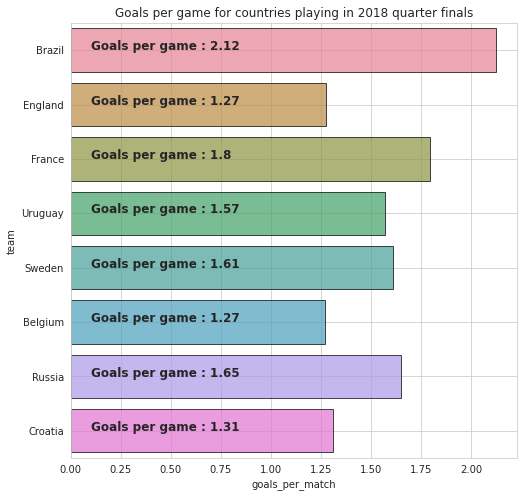

In [99]:
cou = ["Uruguay","France",
       "Brazil" , "Belgium",
       "Sweden" , "England",
       "Russia" , "Croatia" ]

qtr = mat_new[mat_new["team"].isin(cou)]

plt.figure(figsize=(8,8))
ax = sns.barplot(y="team",x="goals_per_match",
                data=qtr,
                linewidth=1,
                palette = "husl",
                alpha=.7,
                edgecolor = "k"*len(qtr))

for i,j in enumerate("Goals per game : " + np.around(qtr["goals_per_match"],2).astype(str)):
    ax.text(.1,i,j,weight = "bold" ,fontsize =12)
plt.grid(True)
plt.title("Goals per game for countries playing in 2018 quarter finals")
plt.show()

# Match outcomes for countries playing 2018 quarter finals

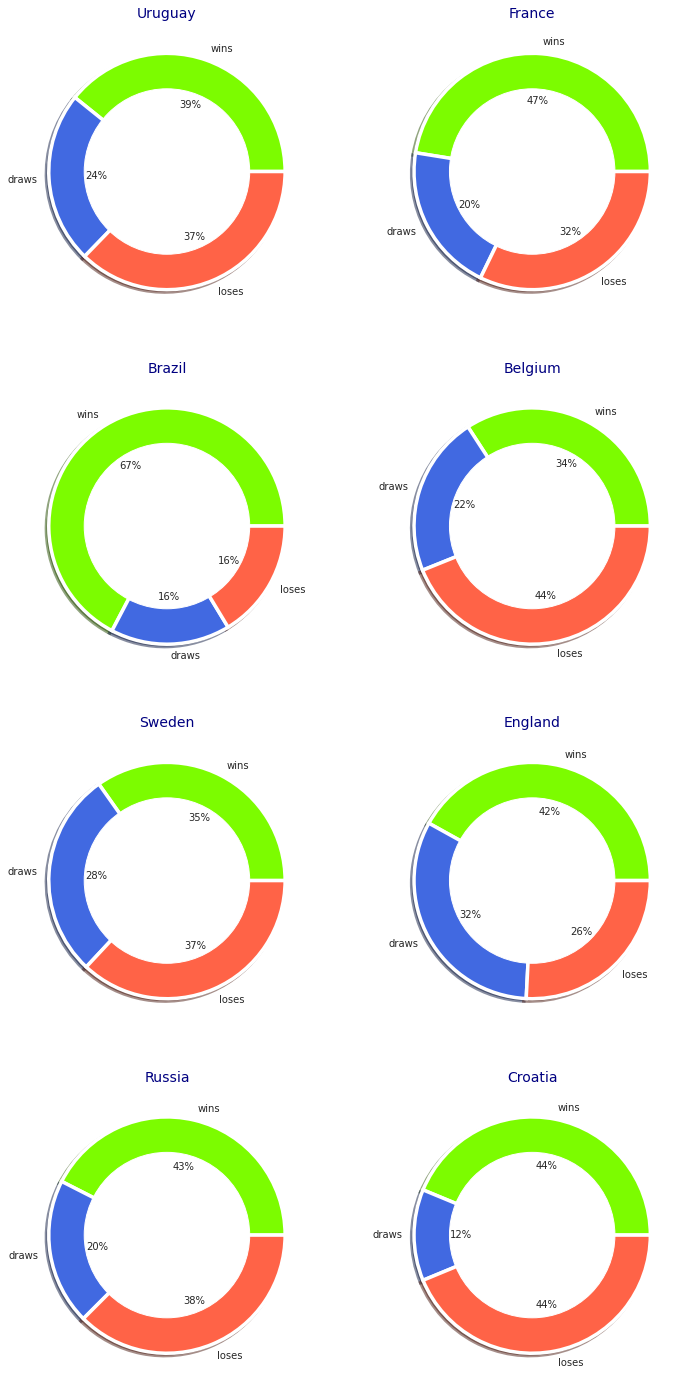

In [100]:
mat_new

cou = ["Uruguay","France",
       "Brazil" , "Belgium",
       "Sweden" , "England",
       "Russia" , "Croatia" ]

length = len(cou)

qtr = mat_new[mat_new["team"].isin(cou)]

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cou,range(length)) : 
    plt.subplot(4,2,j+1)
    
    lab = ["wins","draws","loses"]
    
    plt.pie(qtr[qtr["team"] == i][lab].values.ravel(),
            labels  = lab , 
            autopct = "%1.0f%%",
            shadow  = True,
            wedgeprops = {"linewidth":3.5,"edgecolor":"white"},
            colors  = ["lawngreen","royalblue","tomato"],)
    
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    
    plt.title(i,color="navy",fontsize=14)
    

# Team interactions comparator

In [101]:
#Team interactions comparator

def teams_performance(team1,team2):
    
    list_teams = [team1,team2]
    
    df_new = matches[(matches["Home Team Name"].isin(list_teams))]
    df_new = df_new[df_new["Away Team Name"].isin(list_teams)]
    
    print ("Total Matches       : ", df_new.shape[0])
    print ("Match Years         : ", df_new["Year"].unique().tolist())
    print ("Stadiums played     : ", df_new["Stadium"].unique().tolist(),"\n")
    print ("Match Cities        : ", df_new["City"].unique().tolist())
    print ("Average Attendance  : ", np.around(df_new["Attendance"].mean(),0) , "per game.")
    print ("Average total goals : ", np.around(df_new["total_goals"].mean(),2), "goals per game.")
    print ("-----")
    print ("WINS :") 
    print ("-----")
    print (df_new["win_team"].value_counts().to_string(header = False))

# Brazil - Germany

In [102]:
teams_performance("Germany","Brazil")

Total Matches       :  2
Match Years         :  [2002, 2014]
Stadiums played     :  ['International Stadium Yokohama', 'Estadio Mineirao'] 

Match Cities        :  ['Yokohama ', 'Belo Horizonte ']
Average Attendance  :  63585.0 per game.
Average total goals :  5.0 goals per game.
-----
WINS :
-----
Brazil     1
Germany    1


# Belgium - England

In [103]:
teams_performance("Belgium","England")

Total Matches       :  2
Match Years         :  [1954, 1990]
Stadiums played     :  ['St. Jakob', 'Renato Dall Ara'] 

Match Cities        :  ['Basel ', 'Bologna ']
Average Attendance  :  24260.0 per game.
Average total goals :  4.5 goals per game.
-----
WINS :
-----
England    1
DRAW       1


# Croatia - France

In [104]:
teams_performance("Croatia","France")

Total Matches       :  1
Match Years         :  [1998]
Stadiums played     :  ['Stade de France'] 

Match Cities        :  ['Saint-Denis ']
Average Attendance  :  76000.0 per game.
Average total goals :  3.0 goals per game.
-----
WINS :
-----
France    1
